In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from mydata import *

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
target_users = [
    "@BBC",
    "@CBS",
    "@CNN",
    "@foxnews",
    "@nytimes"
]

In [3]:
# define a funtion pull the tweets and get sentiment results
def tweet_analysis(target_user):
    compound_list =[]
    public_tweets = api.user_timeline(target_user, count=100)
    for tweet in public_tweets:
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        compound_list.append(compound)
    return compound_list

In [4]:
sentiments = [tweet_analysis(target_user) for target_user in target_users]

In [5]:
df = pd.DataFrame({
    "BBC": sentiments[0],
    "CBS": sentiments[1],
    "CNN": sentiments[2],
    "Fox": sentiments[3],
    "New York Times": sentiments[4]
})

In [6]:
df.head()

,BBC,CBS,CNN,Fox,New York Times
0,-0.6808,0.6696,-0.3400,0.4019,-0.3400
1,0.0000,0.3612,0.3818,-0.7964,0.0000
2,0.0000,0.5390,-0.3400,0.4215,0.3182
3,-0.7964,0.2244,0.0000,-0.5106,0.0000
4,0.0000,0.0000,0.4019,0.4404,0.2960


In [7]:
x_axis = np.arange(-len(df),0)

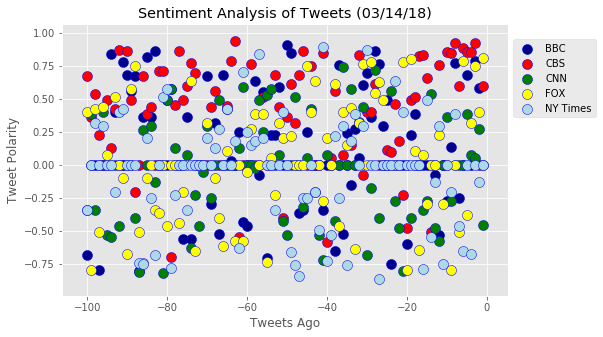

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(x=x_axis, y=df['BBC'], color='DarkBlue', label='BBC', edgecolors = "b", s=100)
plt.scatter(x=x_axis, y=df['CBS'], color='Red', label='CBS', edgecolors = "b", s=100)
plt.scatter(x=x_axis, y=df['CNN'], color='Green', label='CNN', edgecolors = "b", s=100)
plt.scatter(x=x_axis, y=df['Fox'], color='Yellow', label='FOX', edgecolors = "b", s=100)
plt.scatter(x=x_axis, y=df['New York Times'], color='LightBlue',
            label='NY Times', edgecolors = "b", s=100)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))

now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()